In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
titanic=pd.read_csv("/kaggle/input/test-file/tested.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#Lets Take a look at the first 10 rows
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
#How mant rows and columns do we have in the dataset.(shape)
titanic.shape

(418, 12)

In [5]:
#Let us inspect the columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Checking the statistical properties of the dataset.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#informations on the datasets eg.data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#Now lets check for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#Now lets drop the cabin column
titanic_df=titanic.drop(['Cabin'],axis=1)



In [10]:
#Lets check the correlations between the columns
correlations=titanic_df.corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [11]:
#import the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

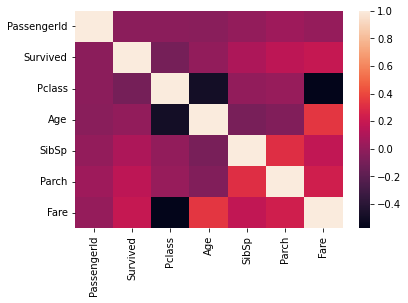

In [12]:
#Now lets visualize correlations with heatmap.
sns.heatmap(correlations)

In [13]:
##Preparing data for machine learning

In [14]:
#Now lets drop some columns that would not be needed.
titanic_df=titanic_df.drop(['PassengerId','Name','Ticket'],axis=1)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [15]:
titanic_df=pd.get_dummies(titanic_df, columns = ['Pclass', 'Sex', 'Embarked'])


In [16]:
titanic_df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,0,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,NaN,0,0,8.0500,0,0,1,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,0,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,0,NaN,0,0,8.0500,0,0,1,0,1,0,0,1


In [17]:
#Dealing with missing data. 

titanic_df["Fare"].fillna((titanic_df["Fare"].mean()),inplace=True)
titanic_df["Age"].fillna((titanic_df["Age"].mean()),inplace=True)

In [18]:
#here the missing values have been replaced with their mean.
titanic_df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,34.50000,0,0,7.8292,0,0,1,0,1,0,1,0
1,1,47.00000,1,0,7.0000,0,0,1,1,0,0,0,1
2,0,62.00000,0,0,9.6875,0,1,0,0,1,0,1,0
3,0,27.00000,0,0,8.6625,0,0,1,0,1,0,0,1
4,1,22.00000,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,0,1,0,1,0,0
415,0,38.50000,0,0,7.2500,0,0,1,0,1,0,0,1
416,0,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1


In [19]:
#define dependent and independent variables
X=titanic_df.drop("Survived",axis=1)
y=titanic_df['Survived']


In [20]:
#Perform feature scaling on the independent variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
#Now lets split x and y in training and test data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
#predictions using logistic regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

[[69  0]
 [ 0 36]]
1.0


In [24]:
#using svm
sv_m=SVC()
sv_m.fit(X_train,y_train)
y_prd=sv_m.predict(X_test)
print(classification_report(y_test, y_prd))
print(confusion_matrix(y_test, y_prd))
print(accuracy_score(y_test,y_prd))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.97      0.99        36

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

[[69  0]
 [ 1 35]]
0.9904761904761905


In [25]:
#Using gridsearchcv for Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid','linear']}
 
grid = GridSearchCV(SVC(), param_grid, cv=10,refit = True, verbose = 3)
grid.fit(X_train,y_train)


Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/10] END ...C=0.1, gamma=1, kernel=sigmoid;, score=0.938 total time=   0.0s
[CV 2/10] END ...C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=3)

In [26]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
# best score
print(grid.best_score_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')
1.0


In [27]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

1.0


In [28]:
#Now with the tuned svm 
sv_m=SVC(C=0.1, gamma=1, kernel='linear')
sv_m.fit(X_train,y_train)
y_prd=sv_m.predict(X_test)
print(classification_report(y_test, y_prd))
print(confusion_matrix(y_test, y_prd))
print(accuracy_score(y_test,y_prd))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

[[69  0]
 [ 0 36]]
1.0
